In [1]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy import pi
from pathlib import Path
import numpy as np
import matplotlib as mpl
from scipy.special import jv

figsize_hams=(4.1,4.1)
figsize_hams_large = (6,6)
fontsize = 9
PlotParams(fontsize=fontsize)
num_sites = 13
axes_tick_pos=np.array([0,2,4,6,8,10,12])
bbox_colourbar_anchor = (0.9, 0.57, 1, 0.73)
colourbar_pad=0.1
colourbar_size_percentage=5
cm_unit = 1/2.54
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
xlabel_coords = [0.52,-0.11]
ylabel_coords = [-0.14,0.5]

ylabel_coords_large = [-0.09,0.5]
xlabel_coords_large = [0.5,-0.08]

save_fig_dir = Path().absolute().parent.parent/"figures"/"thesis"/"floquet"

colourbar_width_large = "3.5%"

### Single Site Shake


0.3917377 -1.0


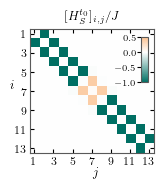

In [2]:
#SSS

centres = np.array([6])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0

params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  




ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_single_site_shake.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




0.3917377 -1.0


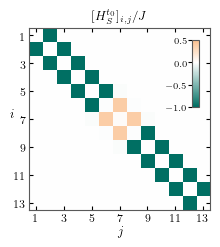

In [3]:
#SSS

centres = np.array([6])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0

params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[f"${i+1}$" for i in axes_tick_pos] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  



ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords_large[0], ylabel_coords_large[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$', fontsize=fontsize)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width=colourbar_width_large,  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_single_site_shake_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()


#### log scale


0.3917377 -1.0


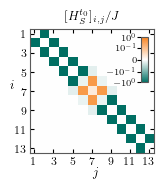

In [4]:
centres = np.array([6])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
sss_log_plot_dir = save_fig_dir/"strob_ham_single_site_shake_log.pdf"

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,1); colourbar_ticks = [-1,-0.1,0,0.1,1]

linthresh = 1e-1
norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=-1.0, vmax=1.0, base=10)

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

new_norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1], base=10)
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(sss_log_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




### SSH

0.2865181 -0.9986129


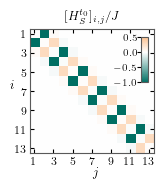

In [5]:
#SSH
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 39; a2 = 38
omega0 = 25; T = 2*pi/omega0
phi0 = 0; onsite0 = 0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, -a1, -a2]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)


colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=
                    7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_ssh.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

0.2865181 -0.9986129


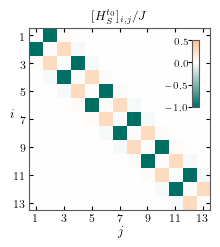

In [6]:
#SSH
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 39; a2 = 38
omega0 = 25; T = 2*pi/omega0
phi0 = 0; onsite0 = 0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, -a1, -a2]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)


colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords_large[0], ylabel_coords_large[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width=colourbar_width_large,  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=
                    7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_ssh_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

#### Edge state

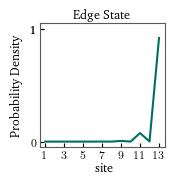

In [7]:
figsize_evec = figsize_hams
from floquet_simulations.hamiltonians import GetEvalsAndEvecsGen
evals, evecs = GetEvalsAndEvecsGen(HF)
fig, ax = plt.subplots(figsize=(figsize_evec[0]*cm_unit, figsize_evec[1]*cm_unit))
ax.plot(np.linspace(1,num_sites,num_sites), np.abs(evecs[:,6])**2, 
            linestyle = "-",
                # linestyle=(1,(3,1,1,1,1)), 
                c='#006F63')

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel("Probability Density", rotation = 90)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
# ax.yaxis.set_label_coords(-0.1,0.5)
ax.set_title("Edge State", y=0.97)

ax.set_xlabel(r"site")
# ax.xaxis.set_label_coords(0.5,-0.09)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_ylim(-0.05, 1.05)
# ax.set_xticks([1,3,5,7,9,11])
ax.set_yticks([0,1,1])
ax.set_xticks([i + 1 for i in axes_tick_pos])
# ax.set_xticklabels(axes_tick_labels)


fig.savefig(save_fig_dir/"zero_energy_edge_state.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()


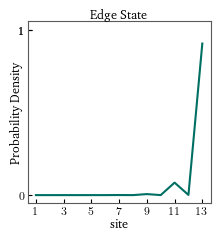

In [8]:

from floquet_simulations.hamiltonians import GetEvalsAndEvecsGen
evals, evecs = GetEvalsAndEvecsGen(HF)
fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))
ax.plot(np.linspace(1,num_sites,num_sites), np.abs(evecs[:,6])**2, 
            linestyle = "-",
                # linestyle=(1,(3,1,1,1,1)), 
                c='#006F63')

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel("Probability Density", rotation = 90)
ax.yaxis.set_label_coords(ylabel_coords_large[0]+0.06, ylabel_coords_large[1])
# ax.yaxis.set_label_coords(-0.1,0.5)
ax.set_title("Edge State", y=0.97)

ax.set_xlabel(r"site")
# ax.xaxis.set_label_coords(0.5,-0.09)
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_ylim(-0.05, 1.05)
# ax.set_xticks([1,3,5,7,9,11])
ax.set_yticks([0,1,1])
ax.set_xticks([i + 1 for i in axes_tick_pos])
# ax.set_xticklabels(axes_tick_labels)


fig.savefig(save_fig_dir/"zero_energy_edge_state_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()


### SSH3

0.3982664 -0.3924209


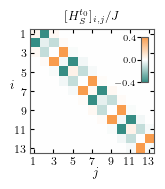

In [9]:
#SSH3 v2
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = -40; a2 = 2.5; a3=-52
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, -a1, -a2, -a3]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
ssh3_plot_dir = Path().absolute().parent.parent/"figures"/"thesis"/"floquet"/"strob_ham_ssh3.pdf"

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-0.5 ,0.5); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.5,0.4)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(ssh3_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




0.3982664 -0.3924209


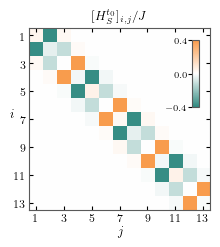

In [10]:
#SSH3 v2
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = -40; a2 = 2.5; a3=-52
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, -a1, -a2, -a3]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 


colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-0.5 ,0.5); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.5,0.4)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords_large[0], ylabel_coords_large[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width=colourbar_width_large,  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_ssh3_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




### SSH4

0.3842382 -0.9793254


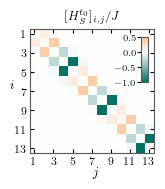

In [11]:
#SSH4
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 16.917322691940058; a2 = -50; a3 = 38.315948852085626; a4 = -10
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0=0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, a4, -a1, -a2, -a3, -a4]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)


ssh4_plot_dir = Path().absolute().parent.parent/"figures"/"thesis"/"floquet"/"strob_ham_ssh4.pdf"

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)


axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(ssh4_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




0.3842382 -0.9793254


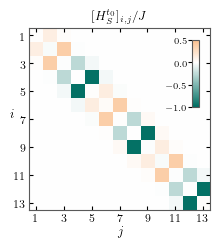

In [12]:
#SSH4
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 16.917322691940058; a2 = -50; a3 = 38.315948852085626; a4 = -10
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0=0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, a4, -a1, -a2, -a3, -a4]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)


axes_tick_labels=[rf"${i+1}$" for i in axes_tick_pos] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords_large[0], ylabel_coords_large[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width=colourbar_width_large,  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(save_fig_dir/"strob_ham_ssh4_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




### Bessel

In [13]:
#bessel
num_sites = 5
centres = [2]
funcs = [Cosine]
omega0 = 10
num_As = 50
As = np.linspace(0,100,num_As)
phi0 = 0
onsite0 =0
hoppings = np.empty(num_As, dtype=np.complex128)
for i, a0 in enumerate(As):
    T = 2*pi/omega0
    params = [[a0, omega0, phi0, onsite0]]
    _, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
    hoppings[i] = HF[2,3]

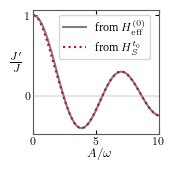

In [14]:

figsize_rec = figsize_hams
fig, ax = plt.subplots(figsize=(figsize_rec[0]*cm_unit, figsize_rec[1]*cm_unit))
ax.hlines(0,-0.5,11, color="0.9")

ax.plot(As/omega0, jv(0, As/omega0), color='0.5', label=r"from $H_\mathrm{eff}^{(0)}$")
ax.plot(As/omega0,  -np.real(hoppings),':', color="#C30934", label=r"from $H_S^{t_0}$")

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xlabel(r"$A/\omega$")
ax.set_ylabel(r"$\frac{J'}{J}$", fontsize=fontsize*1.3, rotation=0)#
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
# ax.set_xticks(np.arange(0,0.27, 0.05))
ax.set_xlim([0,10])
xticks = [0, 5, 10]
ax.set_xticks(xticks)
ax.set_xticklabels([rf"${i}$" for i in xticks])
ax.set_yticks([0,1])
ax.legend(loc='upper right', bbox_to_anchor=(0.98, 1.0), ncol=1 )
bessel_plot_dir =  Path().absolute().parent.parent/"figures"/"thesis"/"floquet"/"bessel_func_strob.pdf"
fig.savefig(bessel_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()


# Black hole

In [15]:
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals

Ndiffs = 12
ymin = -0.38#jv(0, 3.8316) 
tunnellings = np.linspace(-ymin, ymin, Ndiffs) # for linear
tunnellings = tunnellings[::-1]
omega = 25
drive_style = "alternating"
xvals = ComputeAValsFromRequiredGradients(tunnellings)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
                        2*pi/omega,
                        circle_boundary = 0
                        )
#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)
save_fig_dir_bh = Path().absolute().parent.parent/"figures"/"thesis"/"black_hole"

Ham is real


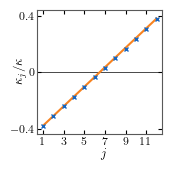

In [16]:
# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit,figsize_hams[1]*cm_unit))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
x = list(range(0, N-1))
plt.plot(x, tunnellings, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label=r"$\frac{\alpha (j - j_h + 0.5)}{4}$",
        # label = r"$\alpha (j - j_h +0.5)/4$",
         c="#F78320")

ax.plot(range(N-1), y, 'x',
        #  label = "1" 
        label=r'$[H_S^{t_0}]_{j,j+1}/(\kappa J_0)$'
        , c="#1565C0", ms = 3)

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  
 
 
ax.set_ylabel(r"$\kappa_{j}/\kappa$")
ax.yaxis.set_label_coords(ylabel_coords[0]+0.05, ylabel_coords[1])
ax.set_yticks([-0.4,0,0.4])
ax.set_ylim([-0.44, 0.44])
ax.set_yticklabels([r"$-0.4$", r"$0$", r"$0.4$"])

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks], font="stix", fontsize=fontsize*0.9)
#  plt.legend(loc="upper right", bbox_to_anchor=(1.1, 2))
# plt.legend(loc="lower left", bbox_to_anchor=(0.4, 0.05))
fig.savefig(save_fig_dir_bh/"HSt0_linear_gradient_tunnelling_terms.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


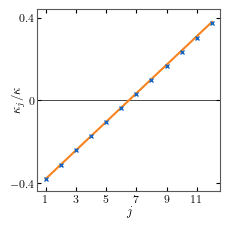

In [22]:
# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit,figsize_hams_large[1]*cm_unit))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
x = list(range(0, N-1))
plt.plot(x, tunnellings, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label=r"$\frac{\alpha (j - j_h + 0.5)}{4}$",
        # label = r"$\alpha (j - j_h +0.5)/4$",
         c="#F78320")

ax.plot(range(N-1), y, 'x',
        #  label = "1" 
        label=r'$[H_S^{t_0}]_{j,j+1}/(\kappa J_0)$'
        , c="#1565C0", ms = 3)

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  
 
 
ax.set_ylabel(r"$\kappa_{j}/\kappa$")
ax.yaxis.set_label_coords(ylabel_coords_large[0] +(0.02), ylabel_coords_large[1])
ax.set_yticks([-0.4,0,0.4])
ax.set_ylim([-0.44, 0.44])
ax.set_yticklabels([r"$-0.4$", r"$0$", r"$0.4$"])

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks], font="stix", fontsize=fontsize*0.9)
#  plt.legend(loc="upper right", bbox_to_anchor=(1.1, 2))
# plt.legend(loc="lower left", bbox_to_anchor=(0.4, 0.05))
fig.savefig(save_fig_dir_bh/"HSt0_linear_gradient_tunnelling_terms_sz6.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


-0.3736586 0.3793787


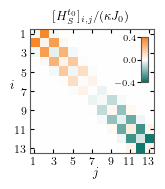

In [18]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)


axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham.pdf"

# figsize = (4.68,4.68)
data_cmap_lims = (-0.4, 0.4); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.6,0.4)
# data_cmap_lims = (-0.4,0.4); colourbar_cmap_lims=(-0.6,0.6); colourbar_ticks = np.arange(-1,1.1,1)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
ax.tick_params(axis='both', which='major', pad=1)
im = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/(\kappa J_0)$')
# ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /(\kappa J_0)$")
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  
 
 
ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)


new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)
fig.savefig(save_fig_dir_bh/"HSt0_linear_gradient.pdf", format="pdf", bbox_inches="tight",  pad_inches=0)
plt.show()




-0.3736586 0.3793787


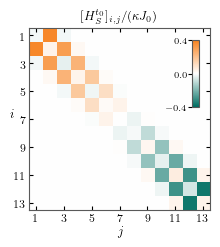

In [19]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)


axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham.pdf"

# figsize = (4.68,4.68)
data_cmap_lims = (-0.4, 0.4); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.6,0.4)
# data_cmap_lims = (-0.4,0.4); colourbar_cmap_lims=(-0.6,0.6); colourbar_ticks = np.arange(-1,1.1,1)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams_large[0]*cm_unit, figsize_hams_large[1]*cm_unit))
ax.tick_params(axis='both', which='major', pad=1)
im = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/(\kappa J_0)$')
# ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /(\kappa J_0)$")
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  
 
 
ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords_large[0], ylabel_coords_large[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords_large[0], xlabel_coords_large[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)


new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))

axins = inset_axes(
    ax,
    width=colourbar_width_large,  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)
fig.savefig(save_fig_dir_bh/"HSt0_linear_gradient_sz6.pdf", format="pdf", bbox_inches="tight",  pad_inches=0)
plt.show()




0.3793787 -0.3736586


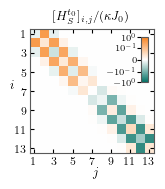

In [20]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,1); colourbar_ticks = [-1,-0.1,0,0.1,1]

linthresh = 1e-1
norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=-1.0, vmax=1.0, base=10)

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title(r'$[H_S^{t_0}]_{i,j}/(\kappa J_0)$')

new_norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1], base=10)
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(Path().absolute().parent.parent/"figures"/"thesis"/"black_hole"/"HSt0_linear_gradient_lognorm.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()


